Processing the 'new' data for the article Kaushik et al: The effect of hyperaldosteronism...
based on the Hyperaldosteronism notebook

In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/work/students/sumit_kaushik/ultrasound_texture`


In [4]:
using Revise
includet("article_experiments.jl")

In [8]:
prefix="/mnt/bio/"

"/mnt/bio/"

For this dataset, we do not have any clinical attributes except the name and the diagnostics

In [9]:
df=read_clinical_attributes("patient_list_new.xlsx")

┌ Info: Column 'Sex' not present, ignoring.
└ @ Main /home/kybic/work/students/sumit_kaushik/ultrasound_texture/article_experiments.jl:75


99×3 DataFrame
 Row │ Dg      pkey     name              
     │ String  Any      String            
─────┼────────────────────────────────────
   1 │ PA      missing  Adamec
   2 │ PA      missing  Andras
   3 │ PA      missing  Apfelthalerová
   4 │ PA      missing  Azlenová
   5 │ PA      missing  Belvončík
   6 │ PA      missing  Boch
   7 │ PA      missing  Brejcha
   8 │ PA      missing  Brodová
   9 │ PA      missing  Bukovský
  10 │ PA      missing  Černý
  11 │ PA      missing  Dundrová
  ⋮  │   ⋮        ⋮             ⋮
  90 │ EH      missing  Pumpr Václav
  91 │ EH      missing  Růžička Jaroslav
  92 │ EH      missing  Svátek Petr
  93 │ EH      missing  Škoulová Ludmila
  94 │ EH      missing  Šticha Milan
  95 │ EH      missing  Třmínek Vladimír
  96 │ EH      missing  Vaněk Petr
  97 │ EH      missing  Vinšová Ivana
  98 │ EH      missing  Volfová Jaroslava
  99 │ EH      missing  Zavázal Tomáš
                           78 rows omitted

In [10]:
unique(filter(x->x.Dg=="PA",df).name)

55-element Vector{String}:
 "Adamec "
 "Andras "
 "Apfelthalerová"
 "Azlenová "
 "Belvončík "
 "Boch "
 "Brejcha "
 "Brodová"
 "Bukovský "
 "Černý"
 "Dundrová"
 "Dvořáková "
 "Graz Jiří"
 ⋮
 "Suchý"
 "Šarláková "
 "Šec "
 "Šikl "
 "Šperk"
 "Thierlová"
 "Vachalová"
 "Valenta "
 "Vodrážková"
 "Vosejpka"
 "Wiesner "
 "Zábský"

In [11]:
textures=prepare_for_classification_with_controls(prefix * "/Ultrasound/majtan/final_150722/","new")

315-element Vector{Feature}:
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.235) Gray{N0f8}(0.239) … Gray{N0f8}(0.318) Gray{N0f8}(0.329); Gray{N0f8}(0.227) Gray{N0f8}(0.231) … Gray{N0f8}(0.325) Gray{N0f8}(0.329); … ; Gray{N0f8}(0.431) Gray{N0f8}(0.424) … Gray{N0f8}(0.576) Gray{N0f8}(0.58); Gray{N0f8}(0.42) Gray{N0f8}(0.4) … Gray{N0f8}(0.561) Gray{N0f8}(0.565)], Bool[0 0 … 1 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0], "Achtar_Adam_150.jpg")
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.09) Gray{N0f8}(0.086) … Gray{N0f8}(0.09) Gray{N0f8}(0.09); Gray{N0f8}(0.078) Gray{N0f8}(0.075) … Gray{N0f8}(0.11) Gray{N0f8}(0.114); … ; Gray{N0f8}(0.29) Gray{N0f8}(0.29) … Gray{N0f8}(0.373) Gray{N0f8}(0.369); Gray{N0f8}(0.322) Gray{N0f8}(0.322) … Gray{N0f8}(0.388) Gray{N0f8}(0.384)], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], "Achtar_Adam_210.jpg")
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.098) Gray{N0f8}(0.098) … Gray{N0f8}(0.114) Gray{N0f8}(0.129); Gray{N0f8}(0.102) Gray{N0f8}(0.102) … Gray{N0f8}(0.157) Gray{N0f8}(0.173)

In [12]:
textures[1].img

In [14]:
Gray.(textures[1].mask)

In [26]:
unique(map(t->t.name,textures))

315-element Vector{String}:
 "Achtar_Adam_150.jpg"
 "Achtar_Adam_210.jpg"
 "Achtar_Adam_270.jpg"
 "Achtar_Adam_90.jpg"
 "Barcak_Andrej_150.jpg"
 "Barcak_Andrej_210.jpg"
 "Barcak_Andrej_90.jpg"
 "Barova_Eva_150.jpg"
 "Barova_Eva_210.jpg"
 "Barova_Eva_270.jpg"
 "Barova_Eva_90.jpg"
 "Fischerova_Jirina_150.jpg"
 "Fischerova_Jirina_210.jpg"
 ⋮
 "Vosejpka_Vladislav_150.jpg"
 "Vosejpka_Vladislav_210.jpg"
 "Vosejpka_Vladislav_270.jpg"
 "Vosejpka_Vladislav_90.jpg"
 "Wiesner_Miroslav_150.jpg"
 "Wiesner_Miroslav_210.jpg"
 "Wiesner_Miroslav_270.jpg"
 "Wiesner_Miroslav_90.jpg"
 "Zabsky_Josef_150.jpg"
 "Zabsky_Josef_210.jpg"
 "Zabsky_Josef_270.jpg"
 "Zabsky_Josef_90.jpg"

In [16]:
rescale_images_in_textures!(textures)

1: name=Achtar_Adam_150.jpg factor=1.8446100494355493
2: name=Achtar_Adam_210.jpg factor=1.8445664121189256
3: name=Achtar_Adam_270.jpg factor=1.1961722488038278
4: name=Achtar_Adam_90.jpg factor=1.111108367637047
5: name=Barcak_Andrej_150.jpg factor=0.9960159362549801
6: name=Barcak_Andrej_210.jpg factor=2.262420277956046
7: name=Barcak_Andrej_90.jpg factor=2.777092160643361
8: name=Barova_Eva_150.jpg factor=2.30412299994938
9: name=Barova_Eva_210.jpg factor=2.2830812215203924
10: name=Barova_Eva_270.jpg factor=2.5372539728245975
11: name=Barova_Eva_90.jpg factor=2.5124359297750445
12: name=Fischerova_Jirina_150.jpg factor=2.4153462022527434
13: name=Fischerova_Jirina_210.jpg factor=2.5125310911942895
14: name=Fischerova_Jirina_270.jpg factor=2.8088114680707688
15: name=Fischerova_Jirina_90.jpg factor=2.777092160643361
16: name=Fleglova_Irena_210.jpg factor=2.525252525252525
17: name=Grofova_Jana_150.jpg factor=4.854140162796641
18: name=Grofova_Jana_210.jpg factor=2.083315249078064
1

147: name=Bukovsky_Stepan_270.jpg factor=2.7932525010032934
148: name=Bukovsky_Stepan_90.jpg factor=3.1635433306853997
149: name=Cerny_Roman_150.jpg factor=0.458350404020784
150: name=Cerny_Roman_270.jpg factor=1.8307159583598942
151: name=Cerny_Roman_90.jpg factor=0.9558115585346652
152: name=Dundrova_Leona_150.jpg factor=0.9450715207573264
153: name=Dundrova_Leona_210.jpg factor=1.8518010486790804
154: name=Dusek_Zdenek_150.jpg factor=2.0917572716425643
155: name=Dusek_Zdenek_210.jpg factor=0.943228347380681
156: name=Dusek_Zdenek_270.jpg factor=0.5180304212972803
157: name=Dusek_Zdenek_90.jpg factor=0.9559600381877288
158: name=Dvorakova_Jitka_150.jpg factor=0.9880188152190543
159: name=Dvorakova_Jitka_210.jpg factor=1.3734398001648669
160: name=Dvorakova_Jitka_90.jpg factor=1.1504440996169154
161: name=Eimannova_J_150.jpg factor=1.5972403083597488
162: name=Graz_J_150.jpg factor=2.5756434600147227
163: name=Graz_J_210.jpg factor=0.97842674452999
164: name=Graz_J_270.jpg factor=0.99

293: name=Vachalova_Daniela_270.jpg factor=4.308904070514572
294: name=Vachalova_Daniela_90.jpg factor=4.237135986070375
295: name=Valenta_Vratislav_150.jpg factor=2.702071174767528
296: name=Valenta_Vratislav_210.jpg factor=3.6228079586489104
297: name=Vodrazkova_Zuzana_150.jpg factor=2.192898089569596
298: name=Vodrazkova_Zuzana_210.jpg factor=1.5974359367153883
299: name=Vodrazkova_Zuzana_90.jpg factor=3.757699428984158
300: name=Vopelak_I_150.jpg factor=3.424577206393247
301: name=Vopelak_I_210.jpg factor=2.7929038673897213
302: name=Vopelak_I_270.jpg factor=3.144094491268935
303: name=Vopelak_I_90.jpg factor=3.0863609523786035
304: name=Vosejpka_Vladislav_150.jpg factor=1.602531177787731
305: name=Vosejpka_Vladislav_210.jpg factor=1.4284781432488425
306: name=Vosejpka_Vladislav_270.jpg factor=1.8449682073205342
307: name=Vosejpka_Vladislav_90.jpg factor=1.639344262295082
308: name=Wiesner_Miroslav_150.jpg factor=1.4084283528319415
309: name=Wiesner_Miroslav_210.jpg factor=1.006017

In [27]:
textures[1].name

"Achtar_Adam_150.jpg"

In [17]:
textures[1].img

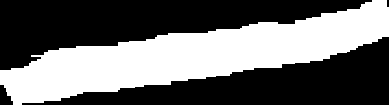

In [18]:
Gray.(textures[1].mask)

In [19]:
dfw,wattrs=calculate_texture_features(textures)

i=1 size=(105, 389) name=Achtar_Adam_150.jpg
i=2 size=(140, 494) name=Achtar_Adam_210.jpg
i=3 size=(90, 392) name=Achtar_Adam_270.jpg
i=4 size=(104, 249) name=Achtar_Adam_90.jpg
i=5 size=(23, 189) name=Barcak_Andrej_150.jpg
i=6 size=(52, 305) name=Barcak_Andrej_210.jpg
i=7 size=(69, 494) name=Barcak_Andrej_90.jpg
i=8 size=(48, 334) name=Barova_Eva_150.jpg
i=9 size=(41, 175) name=Barova_Eva_210.jpg
i=10 size=(68, 233) name=Barova_Eva_270.jpg
i=11 size=(57, 585) name=Barova_Eva_90.jpg
i=12 size=(55, 439) name=Fischerova_Jirina_150.jpg
i=13 size=(50, 256) name=Fischerova_Jirina_210.jpg
i=14 size=(58, 508) name=Fischerova_Jirina_270.jpg
i=15 size=(63, 433) name=Fischerova_Jirina_90.jpg
i=16 size=(55, 401) name=Fleglova_Irena_210.jpg
i=17 size=(116, 383) name=Grofova_Jana_150.jpg
i=18 size=(77, 279) name=Grofova_Jana_210.jpg
i=19 size=(45, 238) name=Grofova_Jana_270.jpg
i=20 size=(106, 805) name=Grofova_Jana_90.jpg
i=21 size=(176, 1025) name=Gurko_Olena_150.jpg
i=22 size=(39, 413) name=Gurk

i=180 size=(148, 713) name=Janacek_Petr_90.jpg
i=181 size=(36, 404) name=Jelinek_Antonin_150.jpg
i=182 size=(47, 642) name=Jelinek_Antonin_210.jpg
i=183 size=(119, 1071) name=Jelinek_Antonin_270.jpg
i=184 size=(77, 652) name=Jelinek_Antonin_90.jpg
i=185 size=(41, 135) name=Kandera_M_150.jpg
i=186 size=(68, 382) name=Kandera_M_210.jpg
i=187 size=(69, 283) name=Kolbaba_Pavel_150.jpg
i=188 size=(64, 522) name=Kolbaba_Pavel_210.jpg
i=189 size=(64, 479) name=Kolbaba_Pavel_270.jpg
i=190 size=(53, 232) name=Kolbaba_Pavel_90.jpg
i=191 size=(47, 391) name=Krista_Miroslav_150.jpg
i=192 size=(90, 830) name=Krista_Miroslav_210.jpg
i=193 size=(50, 195) name=Krista_Miroslav_270.jpg
i=194 size=(69, 303) name=Krista_Miroslav_90.jpg
i=195 size=(38, 356) name=Krupiakova_Jana_150.jpg
i=196 size=(57, 178) name=Krupiakova_Jana_210.jpg
i=197 size=(41, 227) name=Krupiakova_Jana_270.jpg
i=198 size=(116, 608) name=Krupiakova_Jana_90.jpg
i=199 size=(45, 320) name=Kucera_Michal_150.jpg
i=200 size=(62, 234) name=

(315×155 DataFrame
 Row │ W11         W12          W13          W21         W22          W23      ⋯
     │ Float64     Float64      Float64      Float64     Float64      Float64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2.09152e-6  0.000255802  2.81147e-5   1.39584e-5  0.000802979  7.96067e ⋯
   2 │ 7.36831e-7  0.000104531  8.90908e-6   2.18989e-6  0.000399406  2.85751e
   3 │ 1.7612e-6   0.000433969  1.66578e-5   6.29182e-6  0.00135374   4.81649e
   4 │ 3.94337e-6  0.000310731  4.07648e-5   2.26048e-5  0.000824701  0.000108
   5 │ 2.29806e-5  0.00279887   0.000100082  8.02583e-5  0.00684179   0.000259 ⋯
   6 │ 2.27514e-6  0.000520455  2.33837e-5   1.5041e-5   0.00184453   7.35998e
   7 │ 8.08152e-7  0.000222597  1.24786e-5   4.71629e-6  0.000943585  4.29625e
   8 │ 2.06391e-6  0.000682034  2.66865e-5   1.42023e-5  0.00262876   8.30537e
   9 │ 1.43509e-6  0.00018509   1.42022e-5   7.48047e-6  0.00048423   3.88755e ⋯
  10 │ 1.20849e-6  0.

In [32]:
dfw[1,:filename]

"Achtar_Adam_150.jpg"

In [20]:
length(unique(dfw.name))

1

In [21]:
length(unique(df.name))

99

In [33]:
dfa=merge_datasets(df,dfw,"filenamemapping_new.xlsx")

Adamec  PA-> Adamec, [115, 116]
Andras  PA-> Andras, [117, 118, 119, 120]
Apfelthalerová PA-> Apfelthalerova, [121, 122, 123, 124]
Azlenová  PA-> Azlenova, [125, 126, 127, 128]
Belvončík  PA-> Belvoncik, [129, 130, 131, 132]
Boch  PA-> Boch, [133, 134, 135, 136]
Brejcha  PA-> Brejcha, [137, 138, 139, 140, 141, 142, 143]
Brodová PA-> Brodova, [144, 145]
Bukovský  PA-> Bukovsky, [146, 147, 148]
Černý PA-> Cerny, [149, 150, 151]
Dundrová PA-> Dundrova, [152, 153]
Dvořáková  PA-> Dvorakova, [158, 159, 160]
Graz Jiří PA-> Graz, [162, 163, 164, 165]
Hnyk  PA-> Hnyk, [166, 167, 168, 169]
Holman  PA-> Holman, [170, 171, 172]
Hrušková  PA-> Hruskova, [173, 174, 175, 176]
Janáček PA-> Janacek, [177, 178, 179, 180]
Jelínek PA-> Jelinek, [181, 182, 183, 184]
Kanděra  PA-> Kandera, [185, 186]
Kolbaba  PA-> Kolbaba, [187, 188, 189, 190]
Krupiaková  PA-> Krupiakova, [195, 196, 197, 198]
Křišta  PA-> Krista, [191, 192, 193, 194]
No textures entry found for 'Křížek'  PA -> 'Krizek'
Kučera PA-> Kucera, 

307×157 DataFrame
 Row │ Dg      pkey     name               W11         W12          W13        ⋯
     │ String  Any      String             Float64     Float64      Float64    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ EH      missing  Achtar Adam        2.09152e-6  0.000255802  2.81147e-5 ⋯
   2 │ EH      missing  Achtar Adam        7.36831e-7  0.000104531  8.90908e-6
   3 │ EH      missing  Achtar Adam        1.7612e-6   0.000433969  1.66578e-5
   4 │ EH      missing  Achtar Adam        3.94337e-6  0.000310731  4.07648e-5
   5 │ EH      missing  Barčák Andrej      2.29806e-5  0.00279887   0.00010008 ⋯
   6 │ EH      missing  Barčák Andrej      2.27514e-6  0.000520455  2.33837e-5
   7 │ EH      missing  Barčák Andrej      8.08152e-7  0.000222597  1.24786e-5
   8 │ EH      missing  Bárová Eva         2.06391e-6  0.000682034  2.66865e-5
   9 │ EH      missing  Bárová Eva         1.43509e-6  0.00018509   1.42022e-5 ⋯
  10 │ EH      missing  Bárová Eva         1.20849e-6  0.000256602  1.60182e-5
  11 │ EH      missing  Bárová Eva         1.56585e-6  0.000374693  2.25469e-5
  ⋮  │   ⋮        ⋮             ⋮              ⋮            ⋮            ⋮     ⋱
 298 │ PA      missing  Vosejpka           1.57539e-6  0.000160098  2.8966e-5
 299 │ PA      missing  Vosejpka           1.71889e-6  0.000385515  2.85818e-5 ⋯
 300 │ PA      missing  Wiesner            1.44316e-6  0.000447478  1.35749e-5
 301 │ PA      missing  Wiesner            2.72621e-5  0.00117674   0.00013803
 302 │ PA      missing  Wiesner            1.54548e-6  0.000251726  1.45129e-5
 303 │ PA      missing  Wiesner            5.02212e-7  9.31772e-5   3.12029e-6 ⋯
 304 │ PA      missing  Zábský             4.14164e-7  3.76182e-5   1.12225e-5
 305 │ PA      missing  Zábský             2.25943e-6  0.001        2.94901e-5
 306 │ PA      missing  Zábský             9.59331e-7  0.000142389  1.43425e-5
 307 │ PA      missing  Zábský             7.10715e-7  6.03763e-5   1.29804e-5 ⋯
                                                152 columns and 286 rows omitted

In [34]:
length(unique(dfa.name))

87

In [35]:
unique(filter(x->x.Dg=="PA",dfa).name)

48-element Vector{String}:
 "Adamec "
 "Andras "
 "Apfelthalerová"
 "Azlenová "
 "Belvončík "
 "Boch "
 "Brodová"
 "Bukovský "
 "Dundrová"
 "Dvořáková "
 "Graz Jiří"
 "Hnyk "
 "Janáček"
 ⋮
 "Slovák "
 "Soběhartová "
 "Šperk"
 "Spurný "
 "Suchý"
 "Thierlová"
 "Vachalová"
 "Valenta "
 "Vodrážková"
 "Vosejpka"
 "Wiesner "
 "Zábský"

In [36]:
unique(filter(x->x.Dg=="EH",dfa).name)

39-element Vector{String}:
 "Achtar Adam"
 "Barčák Andrej"
 "Bárová Eva"
 "Fischerová Jiřina"
 "Fleglová Irena"
 "Grofová Jana"
 "Gurko Olena"
 "Havlová Ilona"
 "Hrabák Pavel"
 "Klouček Tomáš"
 "Knotková Soňa"
 "Konrád Vilém"
 "Kulhavý Petr"
 ⋮
 "Třmínek Vladimír"
 "Vaněk Petr"
 "Vinšová Ivana"
 "Volfová Jaroslava"
 "Zavázal Tomáš"
 "Brejcha Marcel"
 "Černý Roman"
 "Dušek Zdeněk"
 "Eimannová J"
 "Holman Petr"
 "Hrušková Světlana"
 "Jelínek Antonín"

Calculate the pvalues for the texture features (Table 5) of the article.

In [73]:
pvaluesw=map(a -> calculate_pvalues(dfa,a),wattrs)

152-element Vector{NamedTuple{(:a, :welchpa, :kspa, :mwpa, :welchpc, :kspc, :mwpc), Tuple{Attr, Float64, Float64, Float64, Float64, Float64, Float64}}}:
 (a = Attr("W11", "\$W_{1,1}\$", true, false, 2, texture), welchpa = 0.3027572916498973, kspa = 0.014731467644130051, mwpa = 0.017636191603146993, welchpc = NaN, kspc = NaN, mwpc = NaN)
 (a = Attr("W12", "\$W_{1,2}\$", true, false, 2, texture), welchpa = 0.19701173495274274, kspa = 0.34118381177387447, mwpa = 0.1361111064466805, welchpc = NaN, kspc = NaN, mwpc = NaN)
 (a = Attr("W13", "\$W_{1,3}\$", true, false, 2, texture), welchpa = 0.17990653601571552, kspa = 0.32721052062938705, mwpa = 0.08318962452611528, welchpc = NaN, kspc = NaN, mwpc = NaN)
 (a = Attr("W21", "\$W_{2,1}\$", true, false, 2, texture), welchpa = 0.19997798124381147, kspa = 0.09929211503327415, mwpa = 0.09562175297732534, welchpc = NaN, kspc = NaN, mwpc = NaN)
 (a = Attr("W22", "\$W_{2,2}\$", true, false, 2, texture), welchpa = 0.2173565624579154, kspa = 0.379841975

In [74]:
#filter!(x -> x.welchpa<0.05 || x.welchpc<0.05,pvaluesw) # keep only the significant ones
#filter!(x -> x.welchpa<0.05,pvaluesw)
sort!(pvaluesw, by= x->x.welchpa)
"$(length(pvaluesw)) out of $(length(wattrs)) are significant at the 5% level"

"152 out of 152 are significant at the 5% level"

In [75]:
pvalue_table(pvaluesw;always=true)

$W_{3,2}$ & $0.110$ & $0.208$ & $0.167$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$W_{3,3}$ & $0.119$ & $0.336$ & $0.137$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$W_{2,3}$ & $0.132$ & $0.240$ & $0.098$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$W_{3,1}$ & $0.176$ & $0.116$ & $0.075$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$W_{1,3}$ & $0.180$ & $0.327$ & $0.083$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$W_{1,2}$ & $0.197$ & $0.341$ & $0.136$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$W_{2,1}$ & $0.200$ & $0.099$ & $0.096$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$W_{2,2}$ & $0.217$ & $0.380$ & $0.157$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$W_{1,1}$ & $0.303$ & $0.015$ & $0.018$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$\sigma$ & $0.439$ & $0.870$ & $0.467$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{1,90,3}$ & $0.530$ & $0.622$ & $0.402$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{1,90,6}$ & $0.5

$H_{3,0,4}$ & $0.933$ & $0.701$ & $0.959$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{3,135,4}$ & $0.933$ & $0.701$ & $0.959$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{4,135,3}$ & $0.937$ & $0.915$ & $0.780$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{4,0,3}$ & $0.937$ & $0.915$ & $0.780$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{4,0,6}$ & $0.937$ & $0.885$ & $0.804$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{4,135,6}$ & $0.937$ & $0.885$ & $0.804$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{1,45,4}$ & $0.939$ & $0.783$ & $0.956$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{4,0,1}$ & $0.940$ & $0.959$ & $0.803$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{4,135,1}$ & $0.940$ & $0.959$ & $0.803$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{1,135,7}$ & $0.942$ & $0.733$ & $0.850$ & \textit{N/A} & \textit{N/A} & \textit{N/A}  \\
$H_{1,0,7}$ & $0.942$ & $0.733$ & $0.850$ & \textit{N/A} & \textit{N/A} & \text

Let's try the classification.

In [37]:
textureonlyfilter=x -> x.group==texture
featuresets=[("texture only",textureonlyfilter)]
task0=("PA+EH vs. C", x -> x != "KO", x -> x == "KO")
task1=("PA vs. EH", x -> x == "PA", x -> x == "EH" )
tasks=[task0,task1]
classifier_factory=(@load XGBoostClassifier pkg=XGBoost verbosity=0)
colnames=[:task,:featureset,:acc_mean,:acc_std]
clres=DataFrame([String[],String[],repeat([Float64[]],length(colnames)-2)...],colnames)
for t in tasks
  for f in featuresets
    res=evaluate_classification_accstd(dfa,f,t,wattrs,classifier_factory,nreps=100)
       push!(clres,res)
    end
end
clres

evaluate_classification: task=PA+EH vs. C featureset=texture only attrs=153 group1=0 group2=307
Aggregated measurements:[1.0, 0.0]
evaluate_classification: task=PA vs. EH featureset=texture only attrs=153 group1=136 group2=171
Aggregated measurements:[0.40229885057471265, 0.49320428606142613]


2×4 DataFrame
 Row │ task         featureset    acc_mean  acc_std  
     │ String       String        Float64   Float64  
─────┼───────────────────────────────────────────────
   1 │ PA+EH vs. C  texture only  1.0       0.0
   2 │ PA vs. EH    texture only  0.402299  0.493204

In [57]:
classification_table(clres,tasks,featuresets)

texture only & 0.40 \\


Let's try to combine the old and new data.

In [72]:
df_old=read_clinical_attributes("patient_list.xlsx")

118×81 DataFrame
 Row │ Dg      pkey    name           Age    Sex    ICHS   ICHDK  CMP    DM    ⋯
     │ String  Int64?  String         Int64  Bool   Int64  Int64  Int64  Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ KO         280  Boušková P        66   true      0      0      0      0 ⋯
   2 │ KO         182  Činčár M          40  false      0      0      0      0
   3 │ KO         185  Duchoňová M       54   true      0      0      0      0
   4 │ KO         278  Fryšová M         63   true      0      0      0      0
   5 │ KO         279  Galle P           59  false      0      0      0      0 ⋯
   6 │ KO         276  Hofmanová H       53   true      0      0      0      0
   7 │ KO         224  Holajová Z        58   true      0      0      0      0
   8 │ KO         132  Holý J            61  false      0      0      0      0
   9 │ KO         256  Hübnerová J       53   true      0      0      0      0 ⋯
  10 │ KO         253  Huslar O          52  false      0      0      0      0
  11 │ KO         259  Chlupová J        60   true      0      0      0      0
  ⋮  │   ⋮       ⋮           ⋮          ⋮      ⋮      ⋮      ⋮      ⋮      ⋮   ⋱
 109 │ PA         162  Mraček J          47  false      0      0      0      0
 110 │ PA         269  Neumannová M      67   true      0      0      0      1 ⋯
 111 │ PA          65  Novák V           62  false      0      0      0      1
 112 │ PA         250  Podhorský L       59  false      1      0      0      1
 113 │ PA         130  Procházka J       57  false      0      0      0      1
 114 │ PA         186  Rambousková J     43   true      0      0      0      0 ⋯
 115 │ PA         249  Škapová V         45   true      0      0      0      0
 116 │ PA         211  Štefaňák J        70  false      0      0      0      1
 117 │ PA         267  Štěpánková Z      54   true      0      0      0      0
 118 │ PA         243  Turínová M        52   true      0      0      0      0 ⋯
                                                  72 columns and 97 rows omitted

In [80]:
df_all=vcat(df[!,[:name,:Dg]],df_old[!,[:name,:Dg]]) # concatenate both datasets keeping only common columns

217×2 DataFrame
 Row │ name            Dg     
     │ String          String 
─────┼────────────────────────
   1 │ Adamec          PA
   2 │ Andras          PA
   3 │ Apfelthalerová  PA
   4 │ Azlenová        PA
   5 │ Belvončík       PA
   6 │ Boch            PA
   7 │ Brejcha         PA
   8 │ Brodová         PA
   9 │ Bukovský        PA
  10 │ Černý           PA
  11 │ Dundrová        PA
  ⋮  │       ⋮           ⋮
 208 │ Mraček J        PA
 209 │ Neumannová M    PA
 210 │ Novák V         PA
 211 │ Podhorský L     PA
 212 │ Procházka J     PA
 213 │ Rambousková J   PA
 214 │ Škapová V       PA
 215 │ Štefaňák J      PA
 216 │ Štěpánková Z    PA
 217 │ Turínová M      PA
              196 rows omitted

In [67]:
textures_old=prepare_for_classification_with_controls(prefix * "/Ultrasound/majtan/final_270622/","old")

261-element Vector{Feature}:
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.027) Gray{N0f8}(0.035) … Gray{N0f8}(0.086) Gray{N0f8}(0.082); Gray{N0f8}(0.039) Gray{N0f8}(0.047) … Gray{N0f8}(0.114) Gray{N0f8}(0.11); … ; Gray{N0f8}(0.58) Gray{N0f8}(0.573) … Gray{N0f8}(0.557) Gray{N0f8}(0.565); Gray{N0f8}(0.608) Gray{N0f8}(0.6) … Gray{N0f8}(0.467) Gray{N0f8}(0.471)], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], "Benes_105.bmp")
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.008) Gray{N0f8}(0.012) … Gray{N0f8}(0.063) Gray{N0f8}(0.055); Gray{N0f8}(0.027) Gray{N0f8}(0.027) … Gray{N0f8}(0.082) Gray{N0f8}(0.075); … ; Gray{N0f8}(0.263) Gray{N0f8}(0.243) … Gray{N0f8}(0.184) Gray{N0f8}(0.196); Gray{N0f8}(0.267) Gray{N0f8}(0.267) … Gray{N0f8}(0.192) Gray{N0f8}(0.2)], Bool[0 0 … 1 1; 0 0 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], "Benes_150.bmp")
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.149) Gray{N0f8}(0.137) … Gray{N0f8}(0.024) Gray{N0f8}(0.024); Gray{N0f8}(0.282) Gray{N0f8}(0.267) … Gray{N0f8}(0.027) Gray{N0f8}(0.024); … ; Gr

In [68]:
textures_all=[textures_old;textures]

502-element Vector{Feature}:
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.027) Gray{N0f8}(0.035) … Gray{N0f8}(0.086) Gray{N0f8}(0.082); Gray{N0f8}(0.039) Gray{N0f8}(0.047) … Gray{N0f8}(0.114) Gray{N0f8}(0.11); … ; Gray{N0f8}(0.58) Gray{N0f8}(0.573) … Gray{N0f8}(0.557) Gray{N0f8}(0.565); Gray{N0f8}(0.608) Gray{N0f8}(0.6) … Gray{N0f8}(0.467) Gray{N0f8}(0.471)], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], "Benes_105.bmp")
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.008) Gray{N0f8}(0.012) … Gray{N0f8}(0.063) Gray{N0f8}(0.055); Gray{N0f8}(0.027) Gray{N0f8}(0.027) … Gray{N0f8}(0.082) Gray{N0f8}(0.075); … ; Gray{N0f8}(0.263) Gray{N0f8}(0.243) … Gray{N0f8}(0.184) Gray{N0f8}(0.196); Gray{N0f8}(0.267) Gray{N0f8}(0.267) … Gray{N0f8}(0.192) Gray{N0f8}(0.2)], Bool[0 0 … 1 1; 0 0 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], "Benes_150.bmp")
 Feature(1, Gray{N0f8}[Gray{N0f8}(0.149) Gray{N0f8}(0.137) … Gray{N0f8}(0.024) Gray{N0f8}(0.024); Gray{N0f8}(0.282) Gray{N0f8}(0.267) … Gray{N0f8}(0.027) Gray{N0f8}(0.024); … ; Gr

In [69]:
dfw_all,wattrs=calculate_texture_features(textures_all)

(502×155 DataFrame
 Row │ W11          W12          W13          W21          W22          W23    ⋯
     │ Float64      Float64      Float64      Float64      Float64      Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 5.66346e-5   0.00179912   0.00013535   0.000166069  0.00240834   0.0002 ⋯
   2 │ 0.000173599  0.00119967   0.000404046  0.000157845  0.0017063    0.0003
   3 │ 0.000104176  0.00460281   0.000261863  0.000180404  0.00837036   0.0003
   4 │ 6.30118e-5   0.00227577   0.000182425  0.00021331   0.00427529   0.0003
   5 │ 2.12665e-5   0.000382397  6.46395e-5   7.09434e-5   0.000508242  0.0001 ⋯
   6 │ 0.000111839  0.00291746   0.000317953  0.000216036  0.00588796   0.0003
   7 │ 0.000168699  0.00449234   0.000345984  0.000279872  0.00884147   0.0003
   8 │ 3.12373e-5   0.00204916   0.000110583  8.92396e-5   0.00343335   0.0002
   9 │ 6.71103e-6   0.000175505  2.21431e-5   1.83247e-5   0.000170954  4.4713 ⋯
  10 │ 7.5682e-6    0

In [81]:
dfa_all=merge_datasets(df_all,dfw_all,"filenamemapping_all.xlsx")

Adamec  PA-> Adamec, [376, 377]
Andras  PA-> Andras, [378, 379, 380, 381]
Apfelthalerová PA-> Apfelthalerova, [382, 383, 384, 385]
Azlenová  PA-> Azlenova, [386, 387, 388, 389]
Belvončík  PA-> Belvoncik, [390, 391, 392, 393]
Boch  PA-> Boch, [394, 395, 396, 397]
Brejcha  PA-> Brejcha, [398, 399, 400, 401, 402, 403, 404]
Brodová PA-> Brodova, [405, 406]
Bukovský  PA-> Bukovsky, [407, 408, 409]
Černý PA-> Cerny, [62, 63, 64, 65, 410, 411, 412]
Dundrová PA-> Dundrova, [413, 414]
Dvořáková  PA-> Dvorakova, [419, 420, 421]
Graz Jiří PA-> Graz, [423, 424, 425, 426]
Hnyk  PA-> Hnyk, [427, 428, 429, 430]
Holman  PA-> Holman, [431, 432, 433]
Hrušková  PA-> Hruskova, [434, 435, 436, 437]
Janáček PA-> Janacek, [438, 439, 440, 441]
Jelínek PA-> Jelinek, [442, 443, 444, 445]
Kanděra  PA-> Kandera, [446, 447]
Kolbaba  PA-> Kolbaba, [448, 449, 450, 451]
Krupiaková  PA-> Krupiakova, [456, 457, 458, 459]
Křišta  PA-> Krista, [452, 453, 454, 455]
No textures entry found for 'Křížek'  PA -> 'Krizek'
Kuče

413×156 DataFrame
 Row │ name         Dg      W11          W12          W13          W21         ⋯
     │ String       String  Float64      Float64      Float64      Float64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Beneš M      EH      5.66346e-5   0.00179912   0.00013535   0.000166069 ⋯
   2 │ Beneš M      EH      0.000173599  0.00119967   0.000404046  0.000157845
   3 │ Beneš M      EH      0.000104176  0.00460281   0.000261863  0.000180404
   4 │ Beneš M      EH      6.30118e-5   0.00227577   0.000182425  0.00021331
   5 │ Bulířová V   EH      2.12665e-5   0.000382397  6.46395e-5   7.09434e-5  ⋯
   6 │ Bulířová V   EH      0.000111839  0.00291746   0.000317953  0.000216036
   7 │ Bulířová V   EH      0.000168699  0.00449234   0.000345984  0.000279872
   8 │ Bulířová V   EH      3.12373e-5   0.00204916   0.000110583  8.92396e-5
   9 │ Feierfeil Z  EH      0.000121963  0.00295005   0.000298313  0.000301986 ⋯
  10 │ Feierfeil Z  EH      7.4416e-5    0.00220265   0.000182024  0.000214992
  11 │ Feierfeil Z  EH      4.24724e-5   0.00340429   0.000122474  0.000141602
  ⋮  │      ⋮         ⋮          ⋮            ⋮            ⋮            ⋮      ⋱
 404 │ Lácha        PA      1.66194e-6   0.000210745  1.68247e-5   8.30244e-6
 405 │ Lácha        PA      9.29262e-7   0.000146779  9.84229e-6   2.9042e-6   ⋯
 406 │ Lácha        PA      2.78234e-6   0.000619203  2.90077e-5   1.21498e-5
 407 │ Primas       PA      2.75381e-6   0.000292932  2.85638e-5   1.45886e-5
 408 │ Primas       PA      1.66662e-6   0.000184761  1.74773e-5   6.34477e-6
 409 │ Rajnišová    PA      9.73521e-6   0.000287307  3.57847e-5   2.12253e-5  ⋯
 410 │ Rajnišová    PA      9.95192e-7   0.000150669  1.41554e-5   5.99584e-6
 411 │ Thierlová    PA      2.0619e-6    0.000219985  2.67303e-5   1.40329e-5
 412 │ Thierlová    PA      2.34478e-6   0.000288728  3.08622e-5   1.68594e-5
 413 │ Thierlová    PA      3.5723e-6    0.000228136  3.32176e-5   2.21467e-5  ⋯
                                                150 columns and 392 rows omitted

In [84]:
length(unique(dfa_all.name)), length(unique(df.name)), length(unique(df_old.name))

(107, 99, 118)

In [88]:
pvalueswall=map(a -> calculate_pvalues(dfa_all,a),wattrs)
filter!(x -> x.welchpa<0.05 || x.welchpc<0.05,pvalueswall) # keep only the significant ones
sort!(pvalueswall, by= x->x.welchpa)
pvalue_table(pvalueswall[1:10];always=true)

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/kybic/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_

$H_{3,0,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{3,135,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{4,0,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{4,135,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{2,0,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{2,135,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{5,0,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{5,135,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{3,0,1}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{3,135,1}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\


In [92]:
"$(length(pvalueswall)) out of $(length(wattrs)) are significant at the 5% level"

"88 out of 152 are significant at the 5% level"

In [90]:
filter!(x -> x.welchpa<0.01,pvalueswall) # keep only the significant ones
sort!(pvalueswall, by= x->x.welchpa)
pvalue_table(pvalueswall[1:10];always=true)

$H_{3,0,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{3,135,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{4,0,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{4,135,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{2,0,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{2,135,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{5,0,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{5,135,6}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{3,0,1}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\
$H_{3,135,1}$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$ & $<0.001$  \\


In [93]:
"$(length(pvalueswall)) out of $(length(wattrs)) are significant at the 1% level"

"88 out of 152 are significant at the 1% level"

In [94]:
pvalueswall

88-element Vector{NamedTuple{(:a, :welchpa, :kspa, :mwpa, :welchpc, :kspc, :mwpc), Tuple{Attr, Float64, Float64, Float64, Float64, Float64, Float64}}}:
 (a = Attr("H316", "\$H_{3,0,6}\$", true, false, 2, texture), welchpa = 7.443352406616986e-20, kspa = 3.3281923956992104e-18, mwpa = 2.962629943751597e-17, welchpc = 7.043060667202332e-27, kspc = 5.497727623851258e-17, mwpc = 1.204824563195486e-12)
 (a = Attr("H346", "\$H_{3,135,6}\$", true, false, 2, texture), welchpa = 7.443352406616986e-20, kspa = 3.3281923956992104e-18, mwpa = 2.962629943751597e-17, welchpc = 7.043060667202332e-27, kspc = 5.497727623851258e-17, mwpc = 1.204824563195486e-12)
 (a = Attr("H416", "\$H_{4,0,6}\$", true, false, 2, texture), welchpa = 7.619187144410846e-20, kspa = 1.3060925379601941e-18, mwpa = 3.790579343942335e-17, welchpc = 5.8081432621340384e-27, kspc = 6.786366807217556e-17, mwpc = 1.571633832869836e-12)
 (a = Attr("H446", "\$H_{4,135,6}\$", true, false, 2, texture), welchpa = 7.619187144410958e-20, k

Let's try the classification on the combination of the old and new datasets.

In [97]:
textureonlyfilter=x -> x.group==texture
featuresets=[("texture only",textureonlyfilter)]
task1=("PA vs. EH", x -> x == "PA", x -> x == "EH" )
tasks=[task1]
classifier_factory=(@load XGBoostClassifier pkg=XGBoost verbosity=0)
colnames=[:task,:featureset,:acc_mean,:acc_std]
clresall=DataFrame([String[],String[],repeat([Float64[]],length(colnames)-2)...],colnames)
for t in tasks
  for f in featuresets
    res=evaluate_classification_accstd(dfa_old,f,t,wattrs,classifier_factory,nreps=100)
       push!(clresall,res)
    end
end
clresall

LoadError: UndefVarError: dfa_old not defined